In [3]:
#Database loading and pre-processing

from flask import logging
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

#Create function for checking missing values which accepts a dataframe as its parameter
def null_values_check(df): 
    #Error handling to prevent abnormal termination of operation
    try:
        #if-else statement for null value check 
        if(df.isnull().values.any() == True):
            #if there are null values present, print a column-wise summary of records with null values
            print('Number of null records within each column:\n' + str(df.isnull().sum()))
        else:
            print('There is no missing values in the dataset.')
    
    except Exception as e:
        logging.error(e)

#initialise variable with dataset name
dataset_name = 'chronic_kidney_disease.csv'

#error-handling to prevent abnormal termination of code
try:
    #import and load weather dataset into pandas dataframe
    chronic_kidney_disease_dataframe = pd.read_csv(dataset_name)
    
    #Description of Datasets
    #Print number of records and attributes of whole kidney dataset
    print('Shape of dataset: ' + str(chronic_kidney_disease_dataframe.shape))
    print('Total number of records in dataset = ' + str(chronic_kidney_disease_dataframe.shape[0]))
    print('Total number of attributes in dataset = ' + str(chronic_kidney_disease_dataframe.shape[1]))
    print('')
    #call function created to check for null values
    null_values_check(chronic_kidney_disease_dataframe)
    #Missing value imputation
    #replace ? to nan values
    chronic_kidney_disease_dataframe = chronic_kidney_disease_dataframe.replace('?', np.nan)
    
    #set the features and the target variables
    target_class = chronic_kidney_disease_dataframe['class']
    print('\nAre there missing values in Target Class? ' + str(target_class.isna().any()))
    feature_classes = chronic_kidney_disease_dataframe.iloc[:, 0:24]
    print('\nAre there missing values in the Features? \n' + str(feature_classes.isna().any()))
    
    #KNN imputation (n_neighbour = 5 means that the missing values will be replaced by the mean value of 5 nearest neighbors)
    knn_missing_values_imputer = KNNImputer(n_neighbors=5)
    feature_classes = pd.DataFrame(knn_missing_values_imputer.fit_transform(feature_classes),
                                   columns = feature_classes.columns)
    print('\nNow, Are there any missing values in Features? ' + str(feature_classes.isna().any()))
    
    
    #Scaling and normalization of features
    standard_feature_scaler = StandardScaler()
    feature_classes = standard_feature_scaler.fit_transform(feature_classes)
    feature_classes = pd.DataFrame(feature_classes, columns=['age', 'bp', 'sg', 'al', 'su', 'rbc', 'pc', 
                                                             'pcc', 'ba', 'bgr', 'bu', 'sc', 'sod', 'pot', 
                                                             'hemo', 'pcv', 'wbcc', 'rbcc', 'htn', 'dm', 
                                                             'cad', 'appet', 'pe', 'ane'])
    
    #Encoding target class using label encoding
    target_label_encoder = preprocessing.LabelEncoder()
    target_class = target_label_encoder.fit_transform(target_class)
    target_class1 = pd.DataFrame(target_class, columns=['class'])
    
    #split the dataset into training and testing data
    train_features, test_features, train_target, test_target = train_test_split(feature_classes, target_class, 
                                                                                train_size = 0.7, test_size = 0.3)
    print('\nAfter Pre-processing:')
    print('Size of train dataset: ' + str(train_target.shape[0]))
    print('Size of test dataset: ' + str(test_target.shape[0]))
                                                      
except FileNotFoundError as e:
    logging.error(e)

Shape of dataset: (400, 25)
Total number of records in dataset = 400
Total number of attributes in dataset = 25

There is no missing values in the dataset.

Are there missing values in Target Class? False

Are there missing values in the Features? 
age       True
bp        True
sg        True
al        True
su        True
rbc      False
pc       False
pcc      False
ba       False
bgr       True
bu        True
sc        True
sod       True
pot       True
hemo      True
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
pe       False
ane      False
dtype: bool

Now, Are there any missing values in Features? age      False
bp       False
sg       False
al       False
su       False
rbc      False
pc       False
pcc      False
ba       False
bgr      False
bu       False
sc       False
sod      False
pot      False
hemo     False
pcv      False
wbcc     False
rbcc     False
htn      False
dm       False
cad      False
appet    False
p


After Pre-processing:
Size of train dataset: 280
Size of test dataset: 120


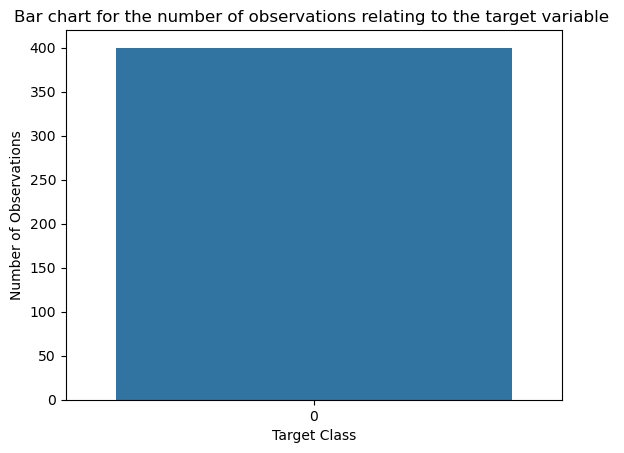

In [6]:
#Target class Visualisatiom

#graph a count plot to check the number of observations relative to the target variable
from matplotlib import pyplot as plt
import seaborn as sns 


sns.countplot(pd.concat([feature_classes, target_class1], axis=1, sort=False)['class'], label = "Count")
plt.title('Bar chart for the number of observations relating to the target variable ')
plt.xlabel('Target Class')
plt.ylabel('Number of Observations')
plt.show()

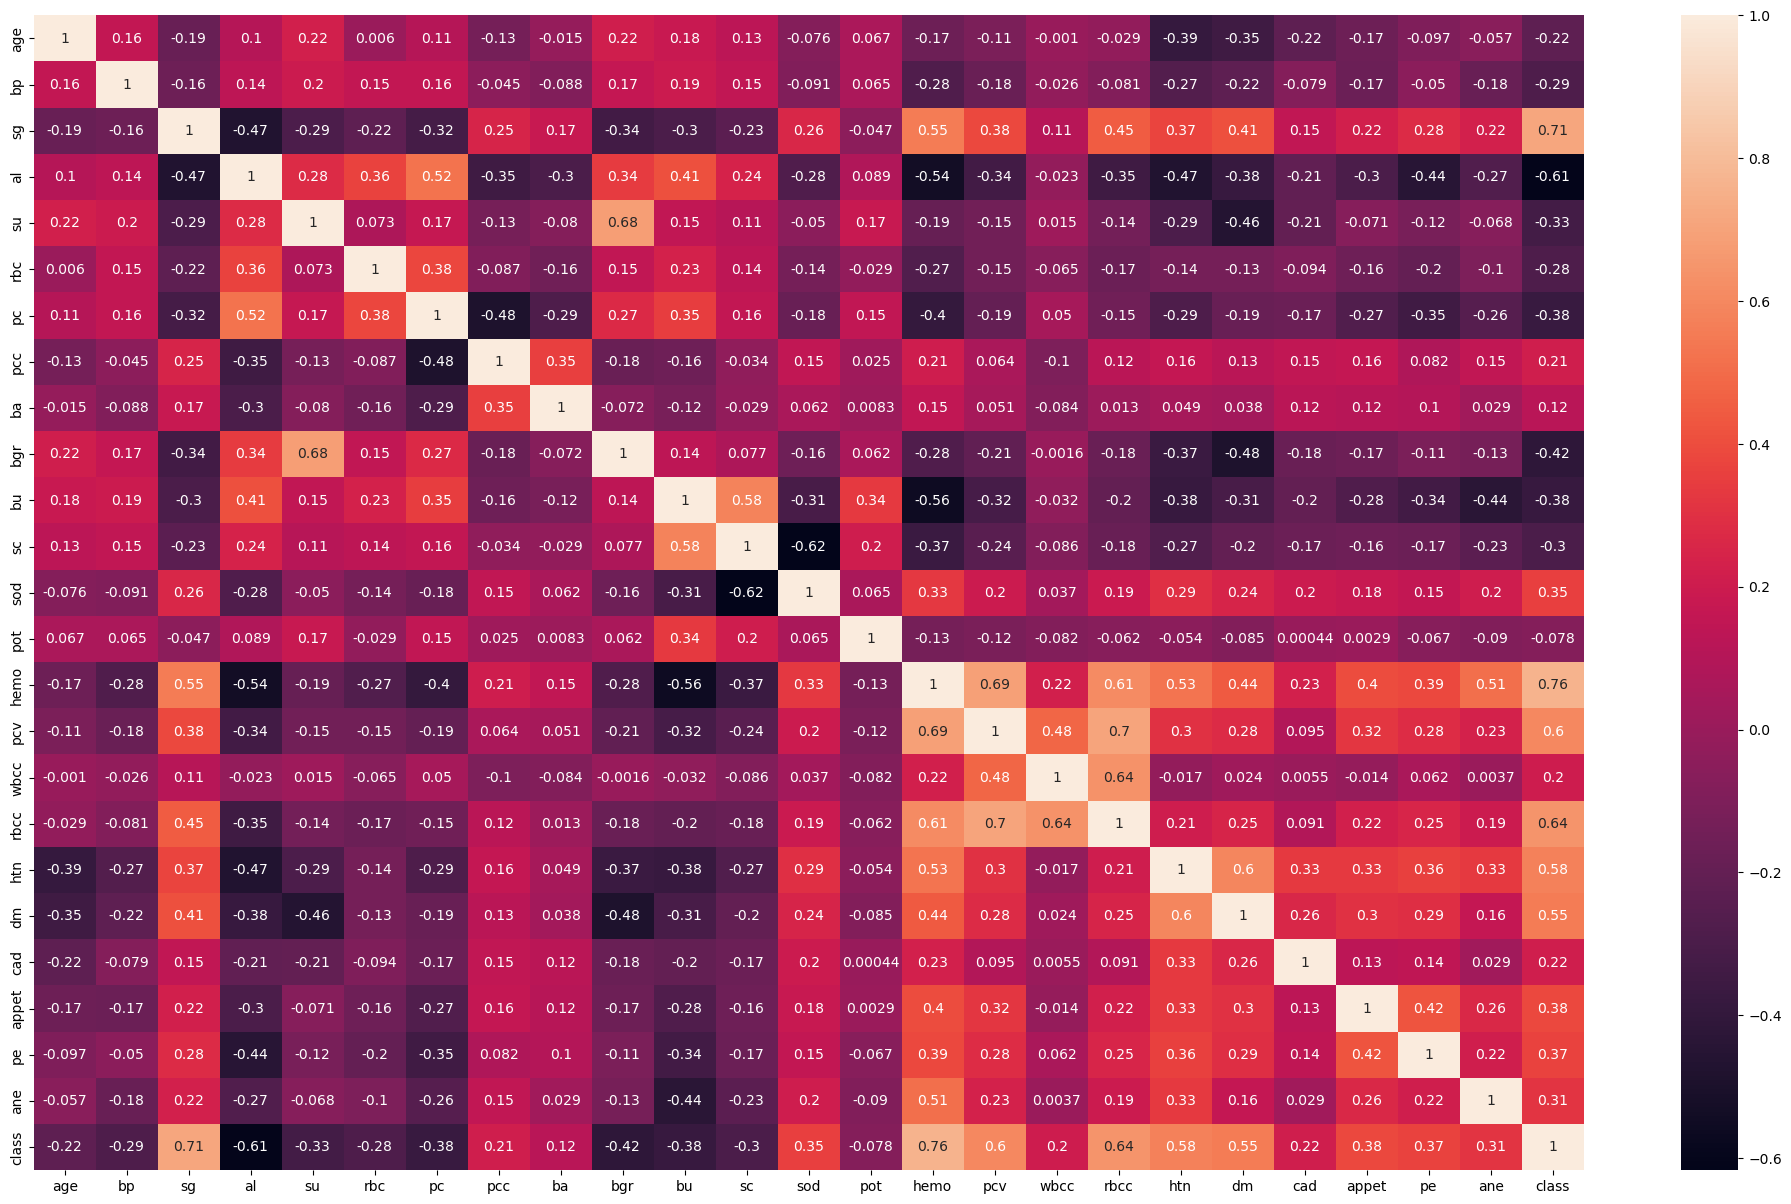



Based on the above plot, Hemoglobin (hemo) and Specific Gravity (sg) have the two highest correlation with the target variable respectively. However, no variables will be discarded for the purpose of this assessment.


In [7]:
plt.figure(figsize=(25,15)) 
sns.heatmap(pd.concat([feature_classes, target_class1], axis=1, sort=False).corr(), annot=True)
plt.show()

print('\n\nBased on the above plot, Hemoglobin (hemo) and Specific Gravity (sg) have the two highest \
correlation with the target variable respectively. However, no variables will be discarded for the \
purpose of this assessment.')

The best parameters are:
 {'C': 1, 'gamma': 'scale', 'kernel': 'sigmoid', 'shrinking': True}

The best model after gridsearch is:
 SVC(C=1, kernel='sigmoid', random_state=0)

Precision: 1.0
Accuracy: 1.0
Recall: 1.0
F1-score: 1.0

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        72
           1       1.00      1.00      1.00        48

    accuracy                           1.00       120
   macro avg       1.00      1.00      1.00       120
weighted avg       1.00      1.00      1.00       120


Confusion Matrix: 
[[72  0]
 [ 0 48]]


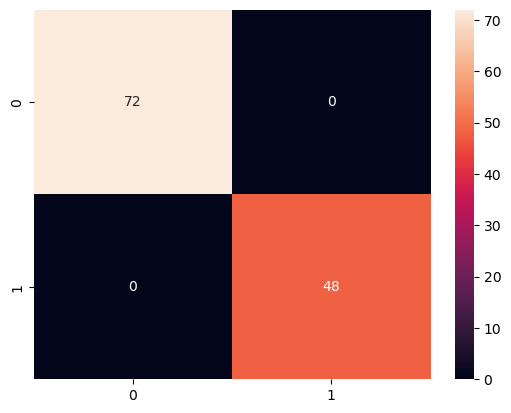

In [8]:
#Support vector machine

from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

#initialise the Support Vector Model
support_vector_machine_model = SVC(random_state = 0)

#defining the svc parameters for grid search
parameters_grid = {'kernel': ['poly', 'rbf', 'linear', 'sigmoid'], 
                   'C': [0.1, 1, 10, 100, 1000], 
                   'gamma': ['scale', 'auto'], 
                   'shrinking': [True, False]}

#apply exhaustice gridsearch to find the optimal solution
svm_grid_search = GridSearchCV(support_vector_machine_model, parameters_grid, scoring = 'accuracy')
#fit the data to the grid
svm_grid_search.fit(train_features, train_target)

#print which are best parameters after gridsearch
print('The best parameters are:\n ' +str(svm_grid_search.best_params_))

#print the best model after gridsearch
print('\nThe best model after gridsearch is:\n ' + str(svm_grid_search.best_estimator_))

#svm predictions on test features
svm_prediction = svm_grid_search.predict(test_features)

#display SVM classification Metrices for SVM
print('\nPrecision: ' + str(metrics.precision_score(test_target, svm_prediction)))
print('Accuracy: ' + str(metrics.accuracy_score(test_target, svm_prediction)))
print('Recall: ' + str(metrics.recall_score(test_target, svm_prediction)))
print('F1-score: ' + str(metrics.f1_score(test_target, svm_prediction)))

#display classification report for SVM
print('\nClassification Report:\n' + str(metrics.classification_report(test_target, svm_prediction)))

#display confusion matrix
print('\nConfusion Matrix: \n' + str(metrics.confusion_matrix(test_target, svm_prediction)))
#plot confusion matrix
sns.heatmap(metrics.confusion_matrix(test_target, svm_prediction), annot = True)
plt.show()